In [1]:
import pandas as pd

df = pd.read_csv("train.csv.bz2")

df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [2]:
X = df.drop("subject", axis = 1).drop("Activity", axis = 1)
Y = df["Activity"]

In [3]:
# Ausgeben von Zeilen und Spalten
X.shape

(7352, 561)

In [4]:
# Daten skalieren, damit eine Spalte nicht schwerer gewichtet wird
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#Kürzere Schreibweise fit und transform
X = scaler.fit_transform(X)

In [5]:
# n_components Anzahl der Hauptkomponente
from sklearn.decomposition import PCA

p = PCA(n_components = 3)

p.fit(X)

X_transformed = p.transform(X)

In [6]:
X_transformed.shape

(7352, 3)

<IPython.core.display.Javascript object>


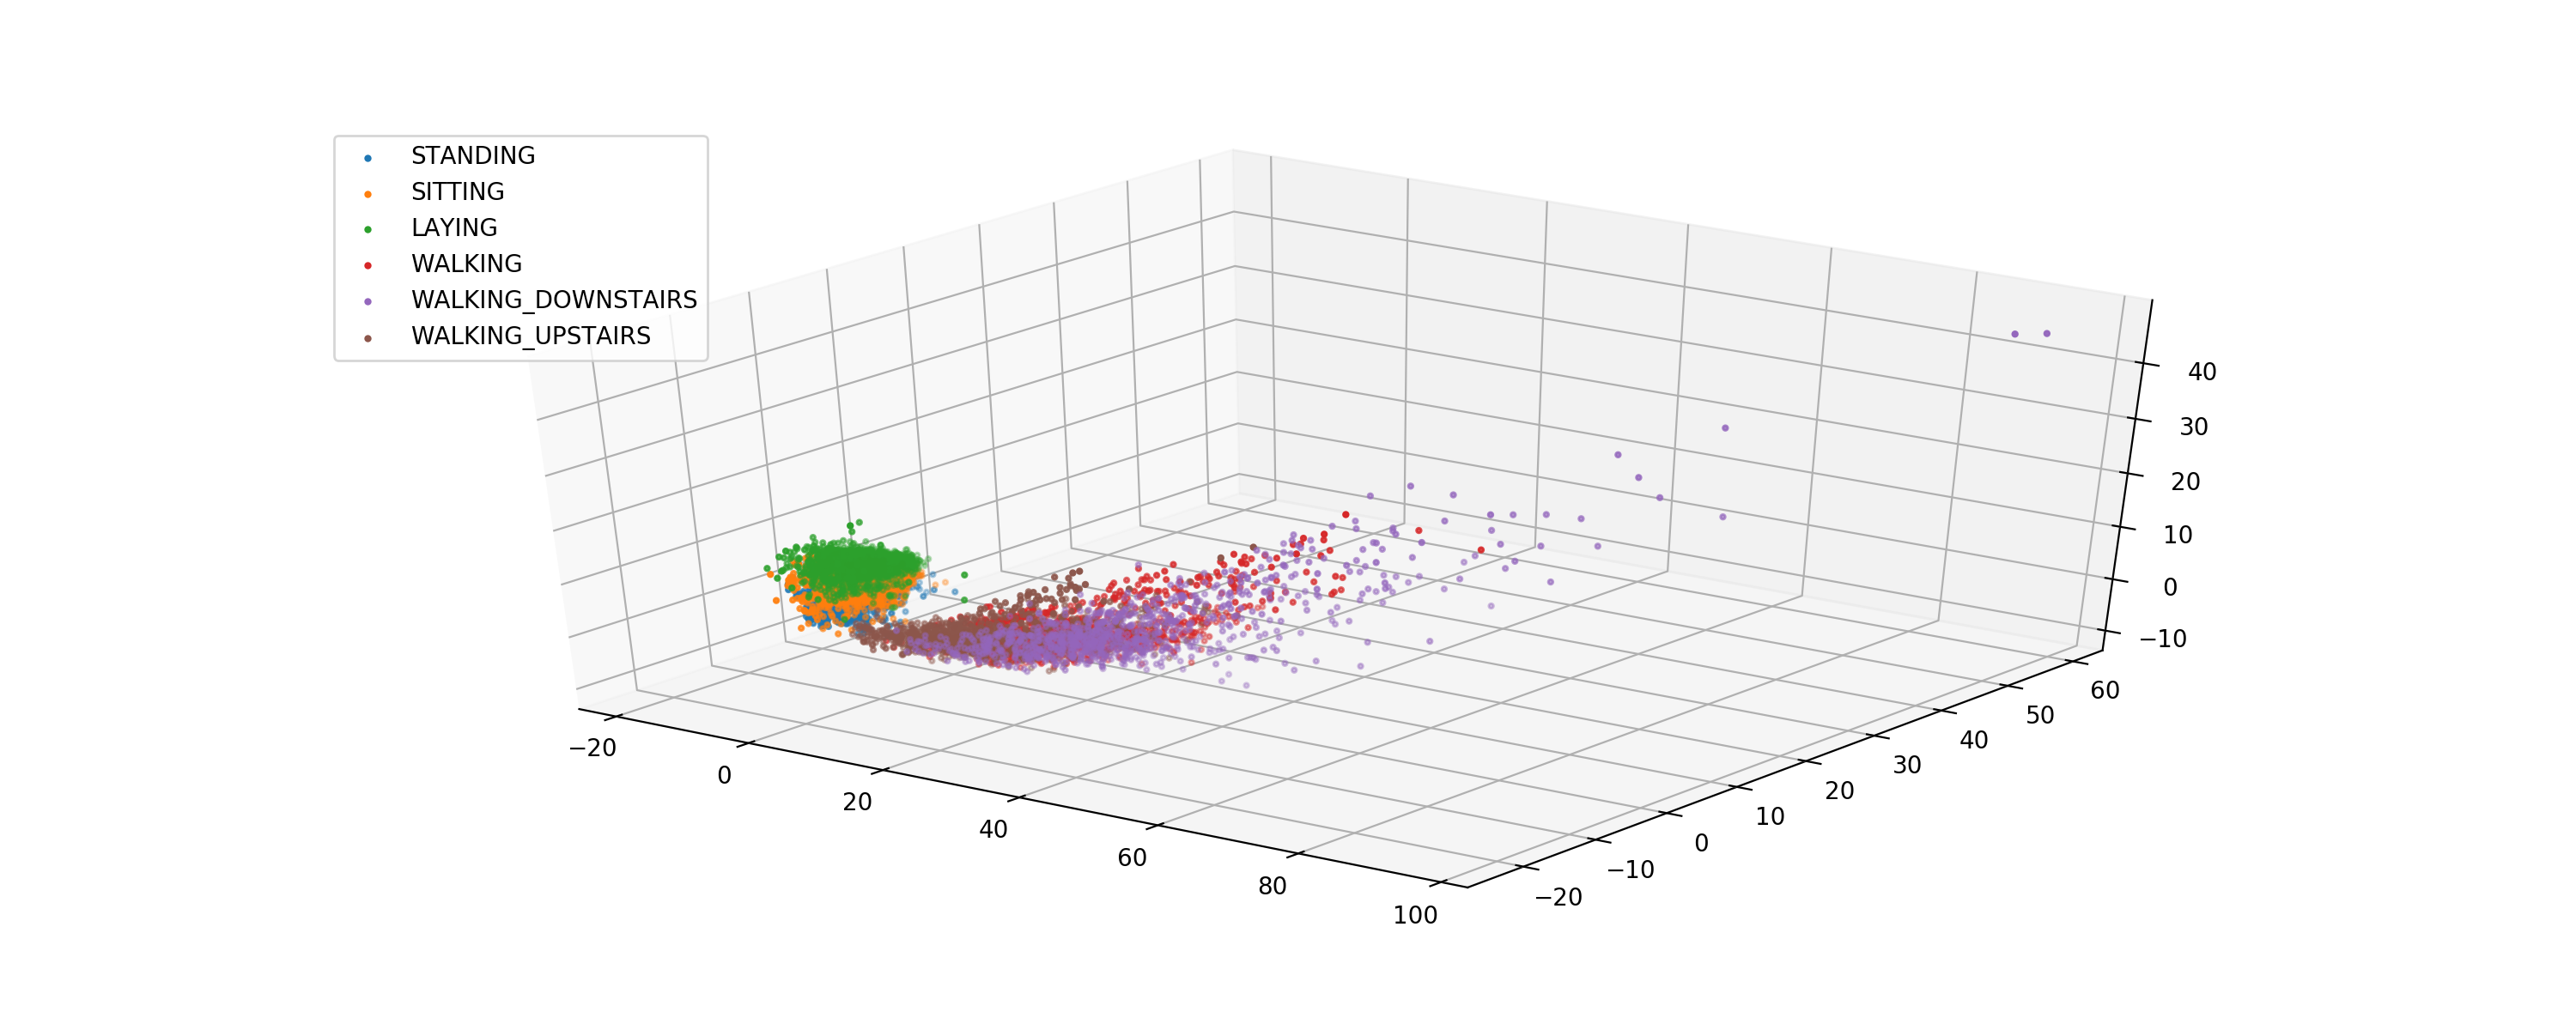

In [7]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# größe der Grafik ändern
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(111, projection = '3d')


for activity in Y.unique():
    X_transformed_filtered = X_transformed[Y == activity, :]
    # holt sich immer nur die erste oder 2 Spalte raus
    # label fügt eine Legende ein
    # s gibt die Größe der Datenpunkte an 
    ax.scatter(
        X_transformed_filtered[:, 0],
        X_transformed_filtered[:, 1],
        X_transformed_filtered[:, 2],
        label = activity,
        s = 4
    )
    
plt.legend()

plt.show()

Daten könnten so interpretiert werden, dass zwei Cluster gebildet werden können zwischen bewegen und nicht bewegen. Logistische Regression könnte hier schon eine gute Genauigkeit erzielen
durch hinzufügen von mehr Hauptkomponenten können die Daten eventuell besser geteilt werden und somit können mehr Cluster entstehen


In [8]:
# die einzelnen Werte ausgeben
Y.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)